<div style="text-align: right"><b>Daniel Stevens</b><br><i>Analise Hofman<i/><br><i>Introduction to Data Visualization- Oct21Dec21</i><br><i>3 Jan 2022</i></div>
    
# **Vancouver Street Trees- Analysis through Importance Values**

Vancouver is a city located on the west coast of Canada, perched between the North Shore Mountains and the Pacific Ocean. Known for its spectacular natural environment, it has been consistently ranked one of the most liveable cities in the world throughout the last decade.

Climate modeling conducted by the Pacific Climate Impacts Consortium in 2016 predicts that the average temperature in the Vancouver region will increase by 3°C by the 2050s and a dramatic increase in days in which the temperature exceeds 25°C will be seen, from an average of 22 days per year to 55 (Climate Projections for Metro Vancouver, 2016). Between June 25th and July 1st of 2021, temperatures rose above 40°C throughout the Province of British Columbia, resulting in 99 deaths in the City of Vancouver (CBC News).

In 2014, the City of Vancouver adopted the Urban Forest Plan as part of its goal to become the greenest city in the world by 2020. The goal of the Urban Forest Plan is to "protect, plant, and manage trees to create a diverse, resilient, and beautiful urban forest on public and private lands across the city." (Urban Forest Plan, 2018). 

The urban forest plays one of many key roles in the City of Vancouver's climate adaptation strategy. Trees in the urban environment mitigate the urban heat island effect which is an increase in temperature in urban areas due to lower tree canopy cover and a high density of heat-absorbing structures such as roads and buildings (Urban Forest Plan, 2018). Approximately 30% of the Vancouver tree population consisted of street trees at the time of the adoption of the Urban Forest Plan in 2014 (Urban Forest Plan, 2018). As such, street trees are central to the urban forest and play an important role in its effort to aid in climate change adaptation.

Understanding the composition of the Vancouver street tree population is vital to its stewardship. We will examine the street tree population through importance value, which is a calculation that takes into account both abundance and size (in the form of dominance) when determining a group's contribution to the overall population, as used by McPherson and Rowntree (1989) in their characterization of various street tree populations at the species level. We will apply the following formulas at the genus level to the Vancouver street tree population:

* $ basal\ area\ =\pi\cdot(\frac{diameter}{2})^2\\ $
<br>
* $ relative\ dominance\ =\ \frac{total\ basal\ area\ of\ genus\ X}{total\ basal\ area\ of\ population}\cdot100\\ $
<br>
* $ relative\ abundance\ =\ \frac{number\ of\ individuals\ of\ genus\ X}{total\ individuals\ in\ population}\cdot100\\ $
<br>
* $ importance\ value\ =\ relative\ abundance + relative\ dominance $
<br>
<br>
* $ relative\ importance\ =\ \frac{total\ importance\ value\ of\ genus\ X}{total\ importance\ value\ of\ population}\cdot100\\ $

<b>Using these calculations, we hope to answer the following questions:</b>
* <i>How do the various genera in the Vancouver street tree population compare to one another in terms of importance to the total population?
* How do the different size classes of the top 3 genera contribute to each genus' importance in the population, and is there a difference in this distribution between these genera?
* How do Vancouver neighbourhoods compare in terms of importance value density of the street tree population?
* How is the importance value of the various street tree genera distributed throughout Vancouver?</i>

We will be using a subset of the Vancouver street trees dataset available through the [City of Vancouver's Open Data Portal](https://opendata.vancouver.ca/explore/dataset/street-trees/information/?disjunctive.species_name&disjunctive.common_name&disjunctive.height_range_id). The subsetted data can be found in the UBC Exploratory Data Visualization [GitHub Data Repository](https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/data/vancouver_trees.csv).
Land area for each neighbourhood was obtained from the [City of Vancouver Website](http://vancouver.ca/news-calendar/areas-of-the-city.aspx) and uploaded to a [GitHub Data Repository](https://raw.githubusercontent.com/Daniel-J-Stevens/data_visualization/main/neighbourhood_demographics.csv)

### Data Imports

In [1]:
# Import necessary modules
import pandas as pd
import altair as alt

# Enable data server
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
# Data URLs
url_vancouver_trees='https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/data/vancouver_trees.csv'
url_geojson = 'https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/data/local-area-boundary.geojson'
url_neighbourhood_demographics = 'https://raw.githubusercontent.com/Daniel-J-Stevens/data_visualization/main/neighbourhood_demographics.csv'

# Convert to TOPO json ** Code taken from "Map Help for Final Project" document **
data_geojson_remote = alt.Data(url=url_geojson, format=alt.DataFormat(property='features',type='json'))

In [3]:
# Import as pandas dataframe
trees_df = pd.read_csv(url_vancouver_trees)
trees_df.head(2)

,std_street,on_street,species_name,neighbourhood_name,date_planted,diameter,street_side_name,genus_name,assigned,civic_number,plant_area,curb,tree_id,common_name,height_range_id,on_street_block,cultivar_name,root_barrier,latitude,longitude
0,W 13TH AV,MAPLE ST,PSEUDOPLATANUS,Kitsilano,NaN,9.0,EVEN,ACER,N,1996,10,Y,13310,SYCAMORE MAPLE,4,2900,NaN,N,49.259856,-123.150586
1,WALES ST,WALES ST,PLATANOIDES,Renfrew-Collingwood,2018-11-28,3.0,ODD,ACER,N,5291,7,Y,259084,PRINCETON GOLD MAPLE,1,5200,PRINCETON GOLD,N,49.236650,-123.051831


### Data Summary

In [4]:
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   std_street          30000 non-null  object 
 1   on_street           30000 non-null  object 
 2   species_name        30000 non-null  object 
 3   neighbourhood_name  30000 non-null  object 
 4   date_planted        14085 non-null  object 
 5   diameter            30000 non-null  float64
 6   street_side_name    30000 non-null  object 
 7   genus_name          30000 non-null  object 
 8   assigned            30000 non-null  object 
 9   civic_number        30000 non-null  int64  
 10  plant_area          29722 non-null  object 
 11  curb                30000 non-null  object 
 12  tree_id             30000 non-null  int64  
 13  common_name         30000 non-null  object 
 14  height_range_id     30000 non-null  int64  
 15  on_street_block     30000 non-null  int64  
 16  cult

In [5]:
trees_df.loc[:,'tree_id'].nunique()

30000

The `trees_df` dataframe consists of 30,000 rows, each representing a unique Vancouver street tree, and 21 columns of various dtypes including float, integer and object, each representing a different tree variable. Variable data types range from categorical (e.g. `genus_name`), quantitative (e.g. `diameter`), ordinal (e.g. `height_range_id`), temporal (e.g. `date_planted`) and spatial (e.g. `latitude`, `longitude`). There are missing values in the `date_planted`, `plant_area` and `cultivar_name` columns.

In [6]:
trees_df.describe()

,diameter,civic_number,tree_id,height_range_id,on_street_block,latitude,longitude
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,12.204926,2974.397233,128252.088500,2.717967,2948.410767,49.247574,-123.106173
std,9.334234,2068.223585,75099.139102,1.555819,2069.837551,0.021178,0.049450
min,0.000000,0.000000,29.000000,0.000000,0.000000,49.200732,-123.223870
25%,4.250000,1319.000000,62110.250000,2.000000,1300.000000,49.230519,-123.144596
50%,10.000000,2646.000000,129058.000000,2.000000,2600.000000,49.248200,-123.104022
75%,17.250000,4063.250000,190963.750000,4.000000,4100.000000,49.263808,-123.062734
max,317.000000,9201.000000,271025.000000,10.000000,9200.000000,49.294528,-123.018258


The mean diameter of the observed trees is 12.20 inches, while the median diameter is 10.00 inches, indicating that the distribution of tree diameter for the full dataset is right-skewed. The maximum diameter is 317.00 inches (over 26 ft), while the minimum diameter is 0.00 inches. These maximum and minimum values both appear unreasonable and will require further investigation to determine their validity.

### Data Validation

Let's create a rug plot to quickly visualize the distribution of tree diameter.

In [7]:
alt.Chart(url_vancouver_trees).mark_tick().encode(
    x=alt.X('diameter:Q')
).properties(width=800)

alt.Chart(...)

The rugplot above looks fairly saturated until approximately 60 inches. Let's filter the data and inspect observations with diameter values exceeding 60 inches, as well as observations with diameter values equaling 0. We will encode the latitude and longitude of these points into a google maps search to allow for easy validation of their measurements through visual inspection. 

In [8]:
base_map = alt.Chart(data_geojson_remote).mark_geoshape(fill=None, stroke='black').encode(
).project(type='identity', reflectY=True)

diameter_outliers= alt.Chart(url_vancouver_trees).mark_circle(color='green', size=80).transform_calculate(
    tree_url= 'https://maps.google.com/?q='+ alt.datum.latitude + ',' + alt.datum.longitude
).encode(
    latitude='latitude:Q',
    longitude='longitude:Q',
    href='tree_url:N',
    tooltip=[alt.Tooltip('tree_id:N', title='Tree ID'),
             alt.Tooltip('common_name:N', title='Common name'),
             alt.Tooltip('neighbourhood_name:N', title='Neighbourhood'),
             alt.Tooltip('diameter:Q', title='Diameter'),
             alt.Tooltip('tree_url:N', title='Google maps')],
    size=alt.Size('diameter:Q', scale=alt.Scale(domain=[-20,400]), legend=alt.Legend(title="Tree Diameter (in)"))
).transform_filter(('(datum.diameter== 0) | (datum.diameter > 60)'))

(base_map + diameter_outliers).properties(width=800, title= 'Tree Diameter Outliers in Vancouver Street Tree Population').configure_view(strokeWidth=0)

alt.LayerChart(...)

Let's start off with tree ID 43236, listed as a <i>Pissard Plum</i> in the Oakridge neighbourhood with a diameter of 0 inches:

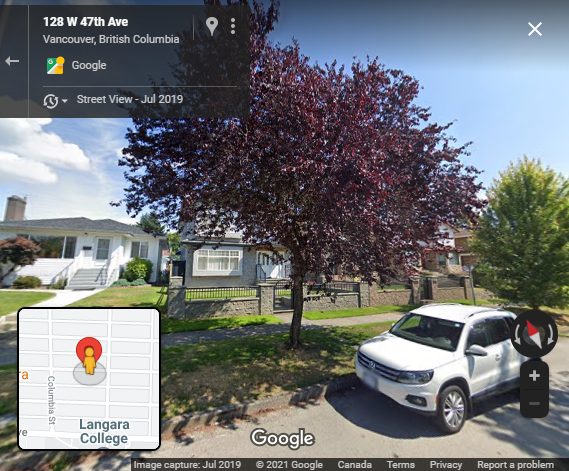

From the image above, it is evident that this tree is not close to 0 inches in diameter.

Next let's look at tree ID 149285 which lies at the other end of the diameter outlier spectrum. This tree is the largest tree listed in the dataset, categorized as a <i>Maple Species</i> in the Kitsilano neighbourhood with a diameter of 317 inches (over 26 feet):

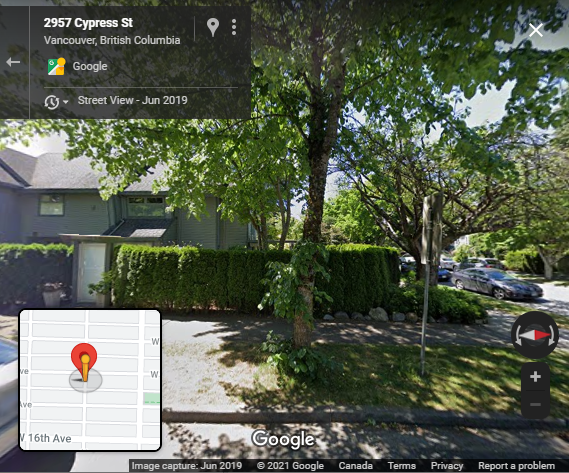

It is obvious from this visualization that the tree does not have a diameter of more than 26 feet.

The diameters of tree IDs 43236 and 149285 are evidently inaccurate, and thus can bet removed from the dataset.

Upon examination of the remaining trees in the `diameter_outliers` map through Google Maps streetview, we can see that a majority of the diameter measurements are inaccurate, however, the validity of some diameters are more ambiguous. As an example, let's look at tree ID 93845, listed as a <i>Deodar Cedar</i> in the Kitsilano neighbourhood with a diameter of 71 inches:

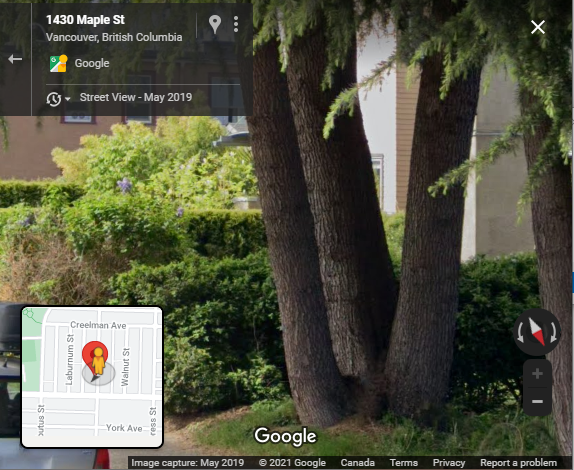

This is a multi-stemmed tree with an overall diameter of 71 inches, the three individual stems each having a smaller diameter. In a study examining methods of multi-stemmed tree measurement, Magarik et al found that there was no significant difference in the predictive power of overall diameter in regards to tree height and crown width of multi-stemmed trees (Magarik et al 2020). For this reason, we can feel justified in keeping these trees as part of the dataset.

Of the outliers present in the `diameter_outliers` map, tree IDs 87265, 168648, 142102, 142079 and 126267 can be kept as part of the data set as their listed diameters are reasonable based on visualization through Google Maps. The remaining outlier trees can be removed from the analysis.

Although this method is not the most robust as far as outlier detection and removal, it is adequate for the scope of this analysis. 

In [9]:
diameter_outlier_ids = [
    43236, 158784, 191867, 188673,
    188672, 222821, 85182, 93845,
    71403, 128151, 23759, 78588,
    51001, 149285
                    ]

Next, we will analyse the validity of the `neighbourhood_name` variable by creating a point map using the latitude and longitude of each tree and faceting by neighbourhood. Any points lying outside of the neighbourhood boundary will be removed from the analysis as the data within the observation is not internally consistent.

In [10]:
neighbourhood_trees = alt.Chart().mark_circle(color='green',size=10).encode(
    latitude='latitude:Q',
    longitude='longitude:Q',
    tooltip=[alt.Tooltip('tree_id:N', title='Tree ID')]
)

alt.layer(base_map, neighbourhood_trees, data=url_vancouver_trees).properties(width=450).facet('neighbourhood_name:N', title='Vancouver Street Trees by Neighbourhood', columns=2).configure_view(strokeWidth=0)

alt.FacetChart(...)

Upon insection of the facet chart above, 28 trees are located outside their listed neighbourhood. We will drop these data points from our analysis.

In [11]:
neighbourhood_outlier_ids=[
    255981,264928,256165, 255911, # Arbutus Ridge
    270750, 59956, # Downtown
    256819, 256822, 256701, 256717, 256719, 256890, 256653, 256706, 256803, 201285, # Dunbar-Southlands
    227312, # Grandview-Woodland
    256183, 255969, 256270, # Kitsilano
    141289, # Mount Pleasant
    256896, 267123, # Renfrew-Collingwood
    263937, # South Cambie
    255068, # West End
    257203, 256894, 257095, 257093 # West Point Grey    
]

### Data Cleansing

Now, let's create a base chart that filters out the previously identified outlier data from which we can build our final analysis charts.

In [12]:
all_outliers = diameter_outlier_ids + neighbourhood_outlier_ids

clean_trees = alt.Chart(url_vancouver_trees).transform_filter(
    {"not": alt.FieldOneOfPredicate(field="tree_id", oneOf=all_outliers)}
)

In [13]:
trees_df[~trees_df['tree_id'].isin(all_outliers)].describe()

,diameter,civic_number,tree_id,height_range_id,on_street_block,latitude,longitude
count,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000,29957.000000
mean,12.179832,2974.227893,128143.781086,2.718964,2948.256601,49.247565,-123.106218
std,9.012142,2068.728158,75042.511379,1.555135,2070.323422,0.021179,0.049435
min,0.250000,0.000000,29.000000,0.000000,0.000000,49.200732,-123.223870
25%,4.250000,1319.000000,62031.000000,2.000000,1300.000000,49.230514,-123.144617
50%,10.000000,2645.000000,128992.000000,2.000000,2600.000000,49.248194,-123.104058
75%,17.250000,4063.000000,190861.000000,4.000000,4100.000000,49.263800,-123.062798
max,72.000000,9201.000000,271025.000000,10.000000,9200.000000,49.294528,-123.023304


29,958 observations remain in cleansed data set, meaning only 0.14% of the observations were dropped for analysis. The maximum diameter of the trimmed data set is 72 inches while the minimum is now 0.25. These values are more reasonable. The mean diameter decreased by only 0.02 inches, from 12.20 inches to 12.18 inches. Removal of the outlier trees decreased the diameter range to a reasonable value while having little effect on the overall count of observations and mean of the diameter. 

### Analysis

To begin our analysis, we will calculate our desired metrics within an altair chart to use as a base for our final figures.

In [14]:
# Create chart with base calculations
base_calc_chart = (
    clean_trees.transform_calculate(  # Calculate basal area in m2
        diameter_m="datum.diameter*0.0254", basal_area="pow(datum.diameter_m/2,2)*PI"
    )
    .transform_joinaggregate(  # Calculate total area and number of trees
        total_basal_area="sum(basal_area)", total_count="count(tree_id)",
    )
    .transform_calculate(  # Calculate dominance, abundance, importance
        relative_dominance="datum.basal_area/datum.total_basal_area",
        relative_abundance="1/datum.total_count",
        importance_value="datum.relative_dominance + datum.relative_abundance",
    ) # Calculate total importance value of population
    .transform_joinaggregate(total_importance="sum(importance_value)")
    .transform_calculate(  # Calculate relative importance of each tree
        relative_importance="datum.importance_value/datum.total_importance"
    )
)

### How do the various genera in the Vancouver street tree population rank in relation to one another in terms of importance in the total population?

In [15]:
# Create genus multi select
genus_click = alt.selection_multi(
    fields=["genus_name"],
    init=[ # Initialize top 3 genera
        {"genus_name": "PRUNUS"},
        {"genus_name": "ACER"},
        {"genus_name": "QUERCUS"},
    ],  
    empty="none",
)

# Create genus importance bar chart
genus_importance_bar = (
    base_calc_chart.mark_bar(color="#54a24b", size=20)
    .transform_aggregate(  # Sum base calculations by genus, count individuals in each genus
        total_relative_importance="sum(relative_importance)",
        total_relative_abundance="sum(relative_abundance)",
        total_relative_dominance="sum(relative_dominance)",
        total_basal_area="sum(basal_area)",
        genus_count="count(tree_id)",
        groupby=["genus_name"],
    )
    .transform_window(  # Rank genera by importance in descending order
        window=[{"op": "rank", "as": "importance_rank"}],
        sort=[{"field": "total_relative_importance", "order": "descending"}],
    )  # Filter to include only top 10 genera
    .transform_filter("datum.importance_rank <= 10")
    .encode(  # encode genus vs importance
        x=alt.X(
            "total_relative_importance:Q",
            title="Relative importance",
            axis=alt.Axis(ticks=False, labels=False, grid=False),
        ),
        y=alt.Y(
            "genus_name:N",
            title=None,
            sort="x",
            axis=alt.Axis(labelFontStyle="bold", labelFontSize=12),
        ),
        tooltip=[
            alt.Tooltip("genus_name:N", title="Genus"),
            alt.Tooltip(
                "total_relative_importance:Q", title="Relative importance", format=".2%"
            ),
        ],
        stroke=alt.condition( # add selection indicator
            genus_click, alt.value("red"), alt.value("black")
        ),  
        strokeWidth=alt.value(4),
    )
    .properties(height=300, width=400, title= '1b.')
)

# Add text to bar chart
genus_importance_bar_text = genus_importance_bar.mark_text(
    dx=30, size=12, baseline="middle", fontStyle="bold"
).encode(
    text=alt.Text("total_relative_importance:Q", format=".2%"), strokeWidth=alt.value(0)
)

# Create dominance vs abundance scatter plot
genus_abundance_dominance_scatter = (
    genus_importance_bar.mark_circle(color="#54a24b")
    .encode(  # encode dominance vs abundance, format axes to %
        x=alt.X(
            "total_relative_abundance:Q",
            title="Relative abundance",
            axis=alt.Axis(format="%", grid=False),
        ),
        y=alt.Y(
            "total_relative_dominance:Q",
            title="Relative dominance",
            axis=alt.Axis(format="%", grid=False),
        ),
        size=alt.Size(  # encode genus importance as size
            "total_relative_importance:Q",
            title="Relative importance",
            legend=alt.Legend(format="%", orient="top-left"),
            scale=alt.Scale(domain=[0, 0.25]),
        ),
        stroke=alt.condition( # Create selection indicator
            genus_click, alt.value("red"), alt.value("black")
        ),  
        strokeWidth=alt.value(4),
        opacity=alt.condition( # decrease opacity of non-selected
            genus_click, alt.value(1), alt.value(0.3)
        ),
        tooltip=[alt.Tooltip('total_relative_abundance:Q', title='Relative abundance', format='.2%'),
                 alt.Tooltip('total_relative_dominance:Q', title='Relative dominance', format='.2%'),
                 alt.Tooltip('total_relative_importance:Q', title='Relative importance', format='.2%')
                ]
    )
    .properties(height=300, width=300, title= '1a.')
)

# Add text to scatter plot
abundance_dominance_text = genus_abundance_dominance_scatter.mark_text(dy=20).encode(
    text=alt.condition(  # Show genus name of selected genera
        genus_click, alt.Text("genus_name:N"), alt.value("")
    ), 
    size=alt.value(12),
    color=alt.value("black"),
    strokeWidth=alt.value(0.5),
    stroke=alt.value("black"),
)

# Create mean basal area reference line
mean_line = {
    "relative_dominance": [0, 0.125, 0.25],
    "relative_abundance": [0, 0.125, 0.25],
}
mean_line_df = pd.DataFrame.from_dict(mean_line)
mean_line_chart = (
    alt.Chart(mean_line_df)
    .mark_line(color="black", strokeDash=[5, 5])  # Create dashed line
    .encode(x=alt.X("relative_abundance:Q"), y=alt.Y("relative_dominance:Q"))
)

# Add reference line text
mean_line_text = (
    mean_line_chart.mark_text(angle=315, dy=-10)  # Angle text to be parallel to line
    .encode(text=alt.value("Mean basal area"))
    .transform_filter("datum.relative_dominance == 0.125")  # Restrict text to center
)

# Create chart title
genus_importance_title = alt.TitleParams(
    "Fig.1: Vancouver Street Tree Population Contains Two Co-Dominant Genera",
    fontSize=20,
    subtitle="Genera Prunus and Acer both show an over 4-fold greater importance value than the next leading genus due to high abundance",
    dy=-20,
    dx=20,
    align="left",
)

# Combine charts, add selection, add title and configure concat chart
(
    (
        genus_abundance_dominance_scatter
        + abundance_dominance_text
        + mean_line_chart
        + mean_line_text
    ).add_selection(genus_click)
    | (genus_importance_bar + genus_importance_bar_text).add_selection(genus_click)
).configure_view(strokeWidth=0).properties(title=genus_importance_title)


alt.HConcatChart(...)

Looking at figure 1a. we can see that genera <i>Prunus</i> and <i>Acer</i> are significantly higher in relative abundance and relative dominance when compared to all other genera. Their proximity to the mean basal area line indicates that their high relative dominance is mainly due to their large quanity in the population and not due to a significantly higher mean diameter of trees within the the genus when compared to the total population.

Upon inspection of figure 1b. we can see that genera <i>Prunus</i> and <i>Acer</i> are co-dominant genera within the Vancouver street tree population, differing by less than 1% in relative importance from eachother, but are each over 4 times greater in importance than <i>Quercus</i>, the genera of the next highest importance value in the population.

Looking back at figure 1a. we can see that although <i>Acer</i> has a higher reative abundance than <i>Prunus</i>, <i>Prunus'</i> relative dominance is higher than <i>Acer</i> due to a higher mean basal area. The higher mean basal area of <i>Prunus</i> is significant enough to raise its imporance value beyond that of <i>Acer</i>. <i>Quercus</i> also has a higher mean basal area when compared to the total population, however, its low abundance decreases its importance to the overall population.

Let's take a closer look at the various size classes of trees in these top 3 genera and examine how they contribute to the relative importance of each.

### How do the different size classes of the top 3 genera contribute to each genus' importance in the population, and is there a difference in this distribution between the genera?

To perform this analysis, we will group trees into different size classes. We will bin the trees in 2 inch intervals as this is the standard way of classifying trees into size categories according to the US Department of Agriculture's Forest Service Forest Inventory and Analysis glossary (“USDA Forest Service”).

We will normalize each distribution to the genus' relative importance value to facilitate comparison between the genera.

In [16]:
top_3_genus = {'"ACER"': "#88d27a", '"PRUNUS"': "#54a24b", '"QUERCUS"': "#f2cf5b"}

# Create hover selection
size_hover = alt.selection_single(
    fields=["diameter_m (binned)"], on="mouseover", empty="none"
)


size_importance = (
    base_calc_chart.transform_joinaggregate(  # Calculate % contribution of each tree to genus importance
        total_relative_importance="sum(relative_importance)", groupby=["genus_name"]
    )
    .transform_calculate(
        percent_of_importance="datum.relative_importance / datum.total_relative_importance"
    )  # Bin trees in 5cm size classes
    .transform_bin(
        "diameter_m (binned)", "diameter_m", bin=alt.Bin(step=0.05),
    )  # Encode % of genus importance vs binned diameter
    .mark_bar(strokeWidth=2, size=6)
    .encode(
        x=alt.X(
            "diameter_m (binned):Q",
            scale=alt.Scale(domain=[0.05, 1.5]),
            axis=alt.Axis(bandPosition=0),
            title="Diameter (m)",
        ),
        y=alt.Y(
            "sum(percent_of_importance):Q",
            scale=alt.Scale(domain=[0, 0.15]),
            axis=alt.Axis(format="%"),
            title="Percent of genus importance",
            stack=False,
        ),  # Add hover indicator
        stroke=alt.condition(size_hover, alt.value("red"), alt.value("black")),
        tooltip=[
            alt.Tooltip("diameter_m (binned):Q", title="Size class (m):", format=".2",)
        ],
    )
    .properties(height=150, width=300)
)

# Create blank v-concat chart
histograms = alt.VConcatChart()

# Create charts of top 3 genera through iteration of top 3 dictionary
for genus, genus_color in top_3_genus.items():
    new_histogram = (
        size_importance.encode(color=alt.value(genus_color))  # add custom color
        .transform_filter("datum.genus_name ==" + genus)  # Filter for genus
        .properties(title=genus)
    )
    new_histogram_text = new_histogram.mark_text(dy=-35, size=15).encode(  # Add % text
        text=alt.Text("sum(percent_of_importance):Q", format=".2%"),
        opacity=alt.condition(
            size_hover, alt.value(1), alt.value(0)
        ),  # Make text appear on hover
        stroke=alt.value("black"),
        color=alt.value("black"),
    )  # Add new chart to concat chart
    histograms = histograms & (
        new_histogram + new_histogram_text
    )

    cumulative_size_importance = (  # Calculate running total of % importance
    size_importance.transform_window(
        groupby=["genus_name"],
        sort=[{"field": "diameter_m (binned)"}],
        frame=[None, 0],
        cumulative_sum="sum(percent_of_importance)",
    )
    .mark_line()
    .encode(  # encode running % total vs diameter
        x=alt.X("diameter_m (binned):Q", title="Diameter (m)"),
        y=alt.Y(
            "max(cumulative_sum):Q",  # Choose max because not aggregated
            axis=alt.Axis(format="%"),
            scale=alt.Scale(domain=[0, 1]),
            title="Cumulative percent of genus importance",
        ),
        stroke=alt.value("black"),
    )
    .properties(height=600, width=450)
)

# Create blank layer charts
cumulative_line = alt.LayerChart()
cumulative_point = alt.LayerChart()

# Create line and point graphs by interating through top 3 dictionary
for genus, genus_color in top_3_genus.items():
    new_line = cumulative_size_importance.encode(
        stroke=alt.value(genus_color), strokeWidth=alt.value(4)  # Add custom colour
    ).transform_filter( # Filter for genus
        "datum.genus_name ==" + genus
    )  
    new_point = new_line.mark_circle(size=100).encode(
        opacity=alt.condition(  # Show point on hover
            size_hover, alt.value(1), alt.value(0)
        ), 
        stroke=alt.value("black"),
        color=alt.value(genus_color),
    )
    new_text = new_point.mark_text(
        dx=35, size=15, fontStyle="bold"
    ).encode(  # Add cumulative % text
        text=alt.Text("max(cumulative_sum):Q", format=".2%"),
        color=alt.value("black"),
        strokeWidth=alt.value(0),
    )  # Add to layer charts
    cumulative_line += new_line
    cumulative_point += new_point
    cumulative_point += new_text

size_title = alt.TitleParams(
    "Fig. 2: Relative importance value is differentially distributed among tree size classes between top 3 genera",
    fontSize=18,
    subtitle="Acer holds more importance in smaller diameter trees, Quercus in relatively larger diameter trees, while Prunus falls between them",
)
(
    histograms.add_selection(size_hover).properties(title='2a.') | (cumulative_line + cumulative_point).properties(title='2b.')
).properties(title=size_title)

alt.HConcatChart(...)

Looking at the importance distributions of figure 2a., we can see that the top 3 genera have a similar range of size classes, however, the total importance value for each genus is distributed differently between them.

The importance value of <i>Acer</i> is held in relatively smaller size classes in comparison to both <i>Prunus</i> and <i>Quercus</i>, showing a right-skewed importance distribution. Figure 2b. shows that <i>Acer</i> has the steepest cumulative importance vs diameter slope, with 50% of the genus' importance being held in size classes 0.35m and below, the most being held in the 0.05m class as seen in the <i>Acer</i> distribution of importance of figure 2a.

The importance value of <i>Prunus</i> is held in relatively larger size classes than <i>Acer</i> but smaller than <i>Quercus</i>. The importance distribution of <i>Prunus</i> shown in figure 2a. shows a slighly right-skewed distribution, but less extreme than that of <i>Acer</i>.This corresponds to Figure 2b. where <i>Prunus</i> shows a less extreme inital slope between the 0m and 0.2m size classes when compared to <i>Acer</i>. The slope increases significantly between 0.2m and 0.6m, catching up and nearly matching <i>Acer</i> from 0.6m on. 50% of the importance value of <i>Prunus</i> is held in size classes 0.45m and below, the most importance being held in the 0.45m size class, at 9.32%.

The importance value of <i>Quercus</i> shows a more even distribution between size classes in comparison to both <i>Prunus</i> and <i>Acer</i> as seen upon inspection of the <i>Quercus</i> importance distribution in figure 2a. Figure 2b. shows that <i>Quercus</i> has the shallowest cumulative importance vs diameter slope of all 3 genera, with 50% of <i>Quercus's</i> importance value being held in size classes 0.6m and below. The 0.6m size class holds the most importance for the <i>Quercus</i> genus at 7.12% of <i>Quercus'</i> total importance.

### How do Vancouver neighbourhoods compare in terms of importance value density of the street tree population?

To perform this analysis, we will group trees by the neighbourhood in which they are located instead of by genus, and normalize the values to the neighbourhood's total land area to obtain an importance density for the neighbourhood. As we are normalizing to the land area of each neighbourhood, we will using total importance value in our calculation as opposed to relative importance value.

In [17]:
# Create hover indicator
neighbourhood_hover = alt.selection_single(
    fields=["neighbourhood_name"], on="mouseover", empty="none"
)

# Create base map with calculations
neighbourhood_importance_map_base = (
    base_calc_chart.transform_lookup(  # Lookup neighbourhood data from geojson
        lookup="neighbourhood_name",
        from_=alt.LookupData(data_geojson_remote, "properties.name"),
        as_="geom",
    )
    .transform_aggregate(  # Find total importance of neighbourhood, median latitude and longitude
        neighbourhood_importance="sum(importance_value)",
        median_longitude="median(longitude):Q",
        median_latitude="median(latitude):Q",
        groupby=["neighbourhood_name", "geom"],
    )
    .transform_lookup(  # Lookup land area of neighbourhood
        lookup="neighbourhood_name",
        from_=alt.LookupData(
            data=url_neighbourhood_demographics,
            key="neighbourhood_name",
            fields=["land_area"],
        ),
        as_="land_area_ha",
    )
    .transform_calculate(  # Extract geometry and type from geojson
        geometry="datum.geom.geometry",
        type="datum.geom.type",
        text_x="0",  # X value for neighbourhood list
        land_area_km2="datum.land_area_ha/100",  # Convert to Km2
        importance_per_km2="(datum.neighbourhood_importance/datum.land_area_km2)*100"
    ).transform_window(  # Rank neighbourhood by importance
        window=[{"op": "rank", "as": "importance_rank"}],
        sort=[{"field": "importance_per_km2", "order": "descending"}],
    )
)

# Create neighbourhood chloropleth map
neighbourhood_importance_map = (
    neighbourhood_importance_map_base.mark_geoshape(stroke="black", strokeWidth=4)
    .encode(  # Encode importance per Km2 in color channel
        color=alt.Color(
            "importance_per_km2:Q",
            scale=alt.Scale(scheme="yellowgreen"),
            legend=alt.Legend(
                format=".2", orient="top-left", title="Neighbourhood importance per Km2"
            ),
        ),
        tooltip=alt.Tooltip("neighbourhood_name:N", title="Neighbourhood"),
    )
    .project(type="identity", reflectY=True)
    .properties(width=700, height=450)
)

# Create neighbourhood hover overlay
neighbourhood_importance_map_overlay = (
    neighbourhood_importance_map_base.mark_geoshape(fill=None, strokeWidth=4)
    .encode(
        stroke=alt.condition(
            neighbourhood_hover, alt.value("red"), alt.value("black")
        ),  # Red border on hover
        opacity=alt.condition(
            neighbourhood_hover, alt.value(1), alt.value(0)
        ),  # Opacity of 0 when not hovering
    )
    .project(type="identity", reflectY=True)
)

# Add text to neighbourhood chloropleth map
neighbourhood_importance_text = neighbourhood_importance_map_base.mark_text(
    fontStyle="bold", fontSize=15
).encode(
    latitude="median_latitude:Q",
    longitude="median_longitude:Q",
    text=alt.Text("importance_per_km2:Q", format=".2"),
)

# Create title for neighbourhood list
neighbourhood_rank_text_title = alt.TitleParams(
    "Neighbourhood", align="left", fontSize=20, fontStyle="bold"
)

# Create neighbourhood list
neighbourhood_rank_text = (
    neighbourhood_importance_map_base.mark_text(
        fontStyle="bold", fontSize=15, align="left"
    )
    .encode(
        y=alt.Y("importance_rank:O", axis=None),  # Order by importance rank
        x=alt.X("text_x:Q", axis=None, scale=alt.Scale(padding=5)),
        text=alt.Text("neighbourhood_name:N"),
        color=alt.condition(
            neighbourhood_hover, alt.value("red"), alt.value("black")
        ),  # Highlight in red on hover
    )
    .properties(width=50, height=450, title=neighbourhood_rank_text_title)
)

# Create chart title
neighbourhood_importance_title = alt.TitleParams(
    "Fig. 3: Vancouver neighbourhoods differ in density of street tree importance",
    subtitle="Kitsilano holds the most importance value per square kilometer, while Strathcona holds the least",
    align="left",
    fontSize=20,
)

# Create layered map and horizonatally concatenate with rank text
(
    (
        neighbourhood_importance_map
        + neighbourhood_importance_text
        + neighbourhood_importance_map_overlay
    )
    | neighbourhood_rank_text.properties(width=50)
).add_selection(neighbourhood_hover).configure_view(strokeWidth=0).properties(
    title=neighbourhood_importance_title
)

alt.HConcatChart(...)

Upon inspection of figure 3 above, we can see that the density of street tree importance differs between Vancouver neighbourhoods.

The neighbourhood of Kitsilano shows the highest importance value density, with a value of 2.5 / Km<sup>2</sup>, followed closely by the West End at 2.4 / Km<sup>2</sup> and Shaughnessy at 2.4 / Km<sup>2</sup>. These neighbourhoods are all contained in the north-western quadrant of the Vancouver area, the West End and Shaughnessy both being neighbourhoods adjacent to Kitsilano.

The neighbourhood of Strathcona shows the lowest importance value density of street trees at 0.71 / Km<sup>2</sup>. This is significantly lower than all other neighbourhoods, the closest neighbourhood in terms of importance value density being Kilarney at 1.1 / Km<sup>2</sup>. The surrounding neighbourhoods of Grandview-Woodland and Mount Pleasant show importance value densities of 1.9 / Km<sup>2</sup> and 2.1 / Km<sup>2</sup> respectively, significantly higher than that of Strathcona, while the remaining adjacent neighbourhood of Downtown also shows a higher importance value density of 1.1 / Km<sup>2</sup>, but less markedly so.

### Discussion

The Vancouver street tree population contains over 80 unique genera, with two highly abundant and highly dominant genera <i>Prunus</i> and <i>Acer</i>, their relative importance value being 23.81% and 23.00% respectively. The prevalence of these two genera in the street tree population presents a potential vulnerability to the role street trees play in Vancouver's Urban Forest Plan. As temperatures increase, will these two genera remain viable and continue to thrive? Are these genera vulnerable to pests that may become more prevalent as average temperatures increase? If these genera are lost or are significantly threatened, nearly 50% of the street tree population importance could disappear. This would greatly diminish the street tree population's contribution to climate adaptation, a major goal of the Vancouver Urban Forest Plan. Further research into the temperature heartiness of these two genera and their susceptibility to pests could further elucidate the actual risks the lack of genus diversity poses. It may be prudent for the City of Vancouver to begin greater diversification of the street tree population and invest in genera that are hearty against temperature extremes and pests in order to safegaurd against such a loss in our uncertain climate future.

The distribution of importance value between size classes differs between the top 3 genera of the street tree population. Due to these differing distributions, the maintenance reqirements for each genus may differ. <i>Acer</i>, holding its importance value in smaller size classes may require maintenance activities more common with younger trees, such as staking, while <i>Prunus</i>, holding more importance in larger trees, may require activities such as pruning to ensure healthy tree structure. <i>Quercus</i>, showing a more even dstribution of importance value between size classes may be more difficult and costly to maintain as a greater range of maintenance activities may be required. In order to preserve the importance value of these genera and optimize use of city funds in this effort, it may be worth while to develop a maintenance strategy that is genus-specific as not all genus populations will require the same type and amount of care.

The density of street tree importance value differs between Vancouver neighbourhoods. Kitsilano holds the highest density of street tree importance value at 2.5 / Km<sup>2</sup> while Strathcona holds the least at 0.71 / Km<sup>2</sup>. Neighbourhoods such as Strathcona, Kilarney and Downtown require strategies to increase stree tree importance value so total importance value of the street tree population is more evenly distributed across all neighbourhoods, and residents of all areas can see the same benefits such as neighbourhood beautification and climate adaptation that the Vancouver Urban Forest Plan is meant to provide. Further investigation into differing environmental conditions such as soil quality or prevalence of concrete surfaces that may prevent tree planting in each neighbourhood would be important in determining if this could be possible.


## Dashboard
### How is the relative importance value of the various street tree genera distributed throughout Vancouver?

In [18]:
# Create selections

# Neighbourhood & Genus selectors
neighbourhood_genus_filter = alt.selection_multi(
    fields=["neighbourhood_name", "genus_name"],
    empty="none",
    init=[
        {"neighbourhood_name": "Kensington-Cedar Cottage", "genus_name": "PRUNUS"},
        {"neighbourhood_name": "Kensington-Cedar Cottage", "genus_name": "ACER"},
    ],
)

neighbourhood_genus_hover = alt.selection_single(
    fields=["neighbourhood_name", "genus_name"], on="mouseover", empty="none"
)


# Create widgets and bind to selectors

# Rank slider
rank_slider = alt.binding_range(min=1, max=80, name="Genus importance rank:")

select_rank = alt.selection_single(
    fields=["genus_rank"], bind=rank_slider, init={"genus_rank": 80}
)

# Genus dropdown
genus_name = (
    pd.read_csv(
        "https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/data/vancouver_trees.csv",
        usecols=["genus_name"],
    )
    .sort_values(by="genus_name")
    .loc[:, "genus_name"]
    .unique()
)

genus_dropdown = alt.binding_select(options=genus_name, name="Genus selection:")

select_genus = alt.selection_single(fields=["genus_name"], bind=genus_dropdown)


# Create genus importance by neighbourhood heat map
heat_map_title = alt.TitleParams(
    "Genus importance distribution by neighbourhood", fontSize=15
)
importance_heat_map = (
    base_calc_chart.mark_rect(stroke="black", strokeWidth=2)
    .encode(
        x=alt.X("neighbourhood_name:N", title="Neighbourhood", sort="-color"),
        y=alt.Y("genus_name:N", title="Genus", sort="color"),
        color=alt.Color(
            "sum(relative_importance):Q",
            scale=alt.Scale(scheme="yellowgreen"),
            legend=alt.Legend(title="Relative importance", format="%", orient="top"),
        ),
        tooltip=[
            alt.Tooltip(
                "sum(relative_importance):Q", format=".2%", title="Relative importance"
            ),
            alt.Tooltip("neighbourhood_name:N", title="Neighbourhood"),
            alt.Tooltip("genus_name:N", title="Genus"),
        ],
    )
    .transform_joinaggregate(
        total_relative_importance="sum(relative_importance)", groupby=["genus_name"]
    )
    .transform_window(
        window=[{"op": "dense_rank", "as": "genus_rank"}],
        sort=[{"field": "total_relative_importance", "order": "descending"}],
    )
    .transform_filter(alt.datum.genus_rank <= select_rank.genus_rank)
    .transform_filter(select_genus)
    .properties(title=heat_map_title)
)

heat_map_overlay = importance_heat_map.mark_rect(fill=None, strokeWidth=4).encode(
    stroke=alt.condition(
        neighbourhood_genus_filter, alt.value("red"), alt.value("black")
    ),
    opacity=alt.condition(neighbourhood_genus_filter, alt.value(1), alt.value(0)),
)

heat_map_hover = heat_map_overlay.encode(
    stroke=alt.condition(
        neighbourhood_genus_hover, alt.value("red"), alt.value("black")
    ),
    opacity=alt.condition(neighbourhood_genus_hover, alt.value(1), alt.value(0)),
)


# Create neighbourhood tree distribution detail map

neighbourhood_detail_title = alt.TitleParams(
    "Neighbourhood Tree Distribution", fontSize=15
)

neighbourhood_map = (
    base_calc_chart.transform_filter(neighbourhood_genus_filter)
    .transform_lookup(
        lookup="neighbourhood_name",
        from_=alt.LookupData(data_geojson_remote, "properties.name"),
        as_="geom",
    )
    .transform_calculate(geometry="datum.geom.geometry", type="datum.geom.type")
    .mark_geoshape(fill=None, stroke="black", strokeWidth=1, color="white")
    .encode()
    .project(type="identity", reflectY=True)
    .properties(height=450)
).add_selection(select_rank)

tree_distribution = (
    base_calc_chart.mark_circle(color="green", strokeWidth=0, size=20)
    .transform_filter(neighbourhood_genus_filter)
    .transform_calculate(
        tree_url="https://maps.google.com/?q="
        + alt.datum.latitude
        + ","
        + alt.datum.longitude
    )
    .encode(
        latitude="latitude:Q",
        longitude="longitude:Q",
        tooltip=[
            alt.Tooltip("tree_id:N", title="Tree ID"),
            alt.Tooltip("genus_name:N", title="Genus"),
            alt.Tooltip("diameter_m:Q", title="Diameter (m)", format=".2"),
        ],
        color=alt.Color("genus_name:N", legend=alt.Legend(title="Genus")),
        href="tree_url:N",
    )
    .add_selection(neighbourhood_genus_filter)
)

# Create overview map
neighbourhood_overview_overlay = neighbourhood_map.mark_geoshape(fill=None).encode(
    stroke=alt.value("red"), strokeWidth=alt.value(4)
)

neighbourhood_overview = (
    neighbourhood_importance_map.encode(
        color=alt.value("#54a24b"), strokeWidth=alt.value(2)
    ).properties(height=200, width=400, title="")
    + neighbourhood_overview_overlay
)

dashboard_title = alt.TitleParams('Vancouver Street Tree Genus Importance and Tree Distribution by Neighbourhood', 
                                  fontSize=20, 
                                  align='left'
                                 )
(
    (
        importance_heat_map.add_selection(neighbourhood_genus_filter)
        .add_selection(neighbourhood_genus_hover)
        .add_selection(select_rank)
        .add_selection(select_genus)
        + heat_map_overlay
        + heat_map_hover
    ).properties(height=700, width=300)
    | (
        (neighbourhood_map + tree_distribution).properties(title=neighbourhood_detail_title) & (neighbourhood_overview)
    ).resolve_scale(x="independent", y="independent")
).configure_view(strokeWidth=0).properties(title=dashboard_title)

alt.HConcatChart(...)

## References

### Articles & Reports
City of Vancouver and Vancouver Park Board. 2018. Urban Forest Strategy:2018 Update. Vancouver, Canada. Retreived from: https://vancouver.ca/files/cov/urban-forest-strategy.pdf

Gomez, Michelle. “June Heat Wave Was the Deadliest Weather Event in Canadian History, Experts Say” [Vancouver, BC]. CBC News, 2 Oct. 2021, www.cbc.ca/news/canada/british-columbia/ubcm-heat-dome-panel-1.6189061.

Magarik, Yasha A. S., et al. “How Should We Measure the DBH of Multi-Stemmed Urban Trees?” Urban Forestry & Urban Greening, vol. 47, 2020, p. 126481. Crossref, https://doi.org/10.1016/j.ufug.2019.126481.

McPherson, E. Gregory, and Rowan A. Rowntree. “Using Structural Measures to Compare: Twenty-Two U.S. Street Tree Populations.” Landscape Journal, vol. 8, no. 1, 1989, pp. 13–23. JSTOR, www.jstor.org/stable/43323997.

Metro Vancouver. 2016. Climate Projections for Metro Vancouver. Burnaby, Canada. Retrieved from: http://www.metrovancouver.org/services/air-quality/AirQualityPublications/ClimateProjectionsForMetroVancouver.pdf

“USDA Forest Service.” USDA Northern Research Station, www.nrs.fs.fed.us/fia/data-tools/state-reports/glossary. Accessed 20 Dec. 2021.

### Data Sources

<b>Subsetted Street trees dataset</b>
<br>
https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/data/vancouver_trees.csv
    
<b>Full Street trees dataset</b>
<br>
Vancouver Board of Parks and Recreation. City of Vancouver Open Data Portal. Street Trees. City of Vancouver. 2016. https://opendata.vancouver.ca/explore/dataset/street-trees/information/?disjunctive.species_name&disjunctive.common_name&disjunctive.height_range_id

<b>Neighbourhood land area</b>
<br>
Vancouver, City Of. “Areas of the City.” City of Vancouver, http://vancouver.ca/news-calendar/areas-of-the-city.aspx. Accessed 20 Dec. 2021.

<b>Vancouver GeoJSON</b>
<br>
https://raw.githubusercontent.com/UBC-MDS/exploratory-data-viz/main/data/local-area-boundary.geojson

### Help Documents

“Aggregate Transforms — Altair 4.2.0 Documentation.” Altair: Declarative Visualization in Python. User Guide., https://altair-viz.github.io/user_guide/transform/aggregate.html. Accessed 4 Jan. 2022.

“Calculate Transform — Altair 4.2.0 Documentation.” Altair: Declarative Visualization in Python. User Guide., https://altair-viz.github.io/user_guide/transform/calculate.html?highlight=transform%20calculate.

“Filter Transform — Altair 4.2.0 Documentation.” Altair: Declarative Visualization in Python. User Guide., https://altair-viz.github.io/user_guide/transform/filter.html.

“Join Aggregate Transform — Altair 4.2.0 Documentation.” Altair: Declarative Visualization in Python. User Guide., https://altair-viz.github.io/user_guide/transform/joinaggregate.html.

"Map Help for Final Project." Introduction to Data Visualization. https://mark-prod-mds.stat.ubc.ca/jupyter/user/768695/doc/tree/data-viz-students/release/final_project/final_project_extras.ipynb